In [106]:
from sklearn import datasets
from sklearn.datasets import load_iris

import pandas as pd
import matplotlib.pyplot as plt
iris = load_iris()

X=iris.data


#建立模型
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)
model.fit(X)
pre = model.predict(X)
center = model.cluster_centers_
print(pre,center)
print(center.shape,pre.shape,X.shape)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2] [[5.006      3.428      1.462      0.246     ]
 [6.85       3.07368421 5.74210526 2.07105263]
 [5.9016129  2.7483871  4.39354839 1.43387097]]
(3, 4) (150,) (150, 4)


In [108]:
df=pd.DataFrame(iris['data'],columns=iris['feature_names']) 
r = pd.concat([df, pd.Series(model.labels_, index = df.index)], axis = 1)  #详细输出每个样本对应的类别
r.columns = list(df.columns) + [u'聚类类别'] #重命名表头
r.to_csv('1.csv') #保存结果

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


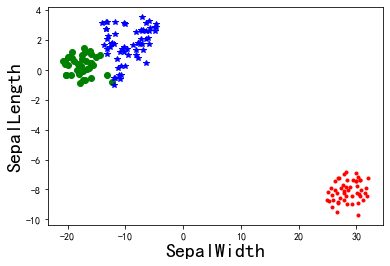

In [113]:
from sklearn.manifold import TSNE
tsne = TSNE()
#df_z = 1.0*(df - df.mean())/df.std()
print(df)
tsne.fit_transform(df) #进行数据降维,并返回结果
tsne = pd.DataFrame(tsne.embedding_, index = df.index) #转换数据格式

import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False #用来正常显示负号

#不同类别用不同颜色和样式绘图
d = tsne[r[u'聚类类别'] == 0]     #找出聚类类别为0的数据对应的降维结果
plt.plot(d[0], d[1], 'r.')
d = tsne[r[u'聚类类别'] == 1]
plt.plot(d[0], d[1], 'go')
d = tsne[r[u'聚类类别'] == 2]
plt.plot(d[0], d[1], 'b*')
plt.xlabel('SepalWidth',fontsize = 20)
plt.ylabel('SepalLength', fontsize = 20)
plt.show()